In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import xgcm 
from fastjmd95 import jmd95numba 
import glob


#path
BASE = '/scratch/ab10313/pleiades/'

PATH_LIST_2d = glob.glob(BASE+'*_smooth/2d_data/')
PATH_LIST_3d = glob.glob(BASE+'*_smooth/3d_data/')
PATH_LIST_PP = glob.glob(BASE+'*_smooth/preprcossed_data/')

In [51]:
PATH_LIST_PP

['/scratch/ab10313/pleiades/15_bengal_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/12_agulhas_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/11_new_zealand_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/10_north_pacific_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/04_equator_atlantic_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/01_gulf_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/03_south_atlantic_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/05_argentina_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/13_australia_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/14_indian_ocean_smooth/preprcossed_data/']

In [52]:
label_list = PATH_LIST_PP
label_list = [y.replace('/scratch/ab10313/pleiades/', '').replace('/preprcossed_data/', '').replace('_smooth', '') for y in label_list]

In [53]:
def load_data(var_name_string,time_window=15,coarsen_factor=12):
    PATH_LIST = glob.glob(BASE+'*_smooth/preprcossed_data/'+var_name_string+'.nc') 
    data_0 = xr.open_dataarray(PATH_LIST[0])
    data_app = data_0.values
    print(PATH_LIST[0])
    print(data_app)
    for i_file in np.arange(1,len(PATH_LIST)):
        PATH = PATH_LIST[i_file]
        data = xr.open_dataarray(PATH)
        data_app = np.concatenate((data_app,data),axis=0)
        print(PATH_LIST[i_file])
        print(data_app)
    return data_app

In [54]:
test = xr.open_dataarray('/scratch/ab10313/pleiades/12_agulhas_smooth/preprcossed_data/k_r_max_mld.nc')

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [43]:
test

<xarray.DataArray (freq_r: 1)>
array([0.070635])
Coordinates:
  * freq_r   (freq_r) float64 0.1028

In [44]:
k_r_max_mld = load_data('k_r_max_mld')

/scratch/ab10313/pleiades/15_bengal_smooth/preprcossed_data/k_r_max_mld.nc
[0.00399514]


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy', 'zarr']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [6]:
k_r_max_mld

array([0.00399514, 0.07295088, 0.02468018, 0.00396205, 0.06086825,
       0.07311192, 0.06760872, 0.07063466, 0.02271331])

In [55]:
WB_kr_cross_spectra_mld = load_data('WB_kr_cross_spectra_mld')

/scratch/ab10313/pleiades/15_bengal_smooth/preprcossed_data/WB_kr_cross_spectra_mld.nc
[6.52472582e-12 4.10140506e-11 3.81894836e-11 3.89459079e-11
 3.43130944e-11 2.90818863e-11 2.62755038e-11 2.31876760e-11
 2.03782193e-11 1.88525721e-11 1.70298907e-11 1.58488367e-11
 1.49023419e-11 1.40563554e-11 1.27284001e-11 1.18513240e-11
 1.10389578e-11 1.02401471e-11 9.61368505e-12 8.97856318e-12
 8.49210557e-12 8.00641733e-12 7.42102897e-12 7.12527832e-12
 6.65907253e-12 6.30970966e-12 6.06550977e-12 5.65849641e-12
 5.41961251e-12 5.03868521e-12 4.79966696e-12 4.54085003e-12
 4.24775712e-12 4.05792330e-12 3.80402018e-12 3.62903455e-12
 3.46793785e-12 3.26505835e-12 3.10405150e-12 2.93457162e-12
 2.76149366e-12 2.60165064e-12 2.45934374e-12 2.34635758e-12
 2.21291517e-12 2.08608687e-12 1.99696725e-12 1.88702533e-12
 1.79096690e-12 1.70209340e-12 1.59998688e-12 1.51432373e-12
 1.43801167e-12 1.35475652e-12 1.28821241e-12 1.22387489e-12
 1.14809357e-12 1.09249309e-12 1.03314921e-12 9.72709038e-1

In [27]:
WB_kr_cross_spectra_mld.shape

(1200,)

In [28]:
WB_kr_cross_spectra_mld_rs = np.reshape(WB_kr_cross_spectra_mld,(len(PATH_LIST_PP),120))

In [29]:
WB_kr_cross_spectra_mld_rs.shape

(10, 120)

In [30]:
PATH_LIST_PP[5]

'/scratch/ab10313/pleiades/01_gulf_smooth/preprcossed_data/'

In [31]:
ds_T = xr.open_dataset(PATH_LIST_3d[5]+'ds_T.nc',engine="h5netcdf")
HML = xr.open_dataarray(PATH_LIST_PP[5]+'HML.nc',engine="h5netcdf")

dx = ds_T.dxF.mean()
WB_cross_spectra = xr.open_dataarray(PATH_LIST_PP[5]+'WB_cross_spectra_z.nc')
k_r = WB_cross_spectra.freq_r/dx/1e-3

In [32]:
WB_kr_cross_spectra_mld_rs.shape

(10, 120)

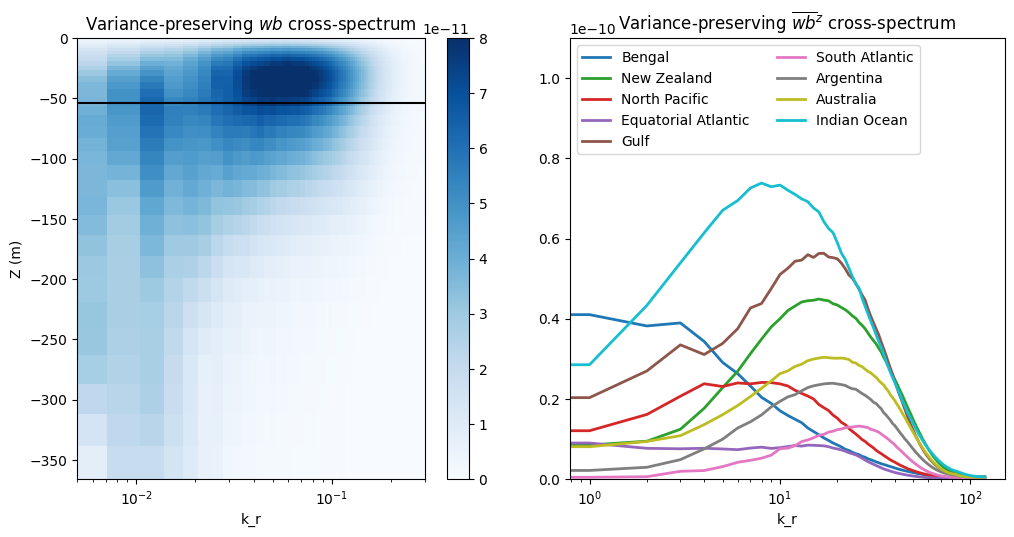

In [37]:
PATH_LIST = glob.glob(BASE+'*/preprcossed_data/WB_kr_cross_spectra_mld.nc') 
label_list = ['Bengal','', 'New Zealand', 'North Pacific', 'Equatorial Atlantic',
              'Gulf', 'South Atlantic', 'Argentina', 'Australia', 'Indian Ocean']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(122)
for i_file in np.arange(0,len(PATH_LIST_PP)): 
    plt.plot(WB_kr_cross_spectra_mld_rs[i_file,:],linewidth=2,label=label_list[i_file]);
    plt.legend(ncol=2,loc='upper left')
    plt.xscale("log")
    plt.ylim([0,11e-11])
    plt.xlabel('k_r')
    plt.title('Variance-preserving $\overline{wb}^z$ cross-spectrum')
    
    
plt.subplot(121)
plt.pcolor(k_r, ds_T.Z[:35], WB_cross_spectra.real[:35,:]*k_r, cmap='Blues',vmin=0, vmax=8e-11)
plt.axhline(HML.mean().values,color = 'k', linestyle = '-')
plt.xscale("log")
plt.xlabel('k_r')
plt.ylabel('Z (m)')
plt.xlim([5e-3,3e-1])
plt.colorbar()
plt.title('Variance-preserving $wb$ cross-spectrum')


plt.savefig('wb_cospectrum.png')

In [45]:
WB_kr_cross_spectra_mld.shape

(1200,)

In [24]:
L_max = 1/k_r_max_mld
L_max

array([250.30416976,  13.70785365,  40.51834082, 252.39470964,
        16.42892623,  13.67766016,  14.7909917 ,  14.15735489,
        44.02705239])

In [ ]:
for i_file in np.arange(0,len(PATH_LIST)):
    # paths to dataset
    PATH_2d = PATH_LIST_2d[i_file]
    PATH_3d = PATH_LIST_3d[i_file]

    # make diirectory for preprocessed variables
    PATH_PP = PATH_LIST_PP[i_file]


    # load 3d data
    ds_T = xr.open_dataset(PATH_3d+'ds_T.nc',engine="h5netcdf")
    ds_S = xr.open_dataset(PATH_3d+'ds_S.nc',engine="h5netcdf")
    ds_W = xr.open_dataset(PATH_3d+'ds_W.nc',engine="h5netcdf")



    # find min and max i and j to crop to 10X10 degrees

    i_min = np.max([ds_T.i.min().values, ds_S.i.min().values, ds_W.i.min().values])
    i_max = np.min([ds_T.i.max().values, ds_S.i.max().values, ds_W.i.max().values])
    j_min = np.max([ds_T.j.min().values, ds_S.j.min().values, ds_W.j.min().values])
    j_max = np.min([ds_T.j.max().values, ds_S.j.max().values, ds_W.j.max().values])


    #define slice to 480 index

    if i_min+480>i_max:
        print('cropped region error in i')
    elif j_min+480>j_max:
        print('cropped region error in j')
    else:
        i_slice = slice(i_min,i_min+480)
    j_slice = slice(j_min,j_min+480)



    # merge datasets

    ds_3d =xr.merge([ds_T.sel(i=i_slice,j=j_slice), ds_S.sel(i=i_slice,j=j_slice), ds_W.sel(i=i_slice,j=j_slice)])


    # define grids 
    grid_3d = xgcm.Grid(ds_3d)


    # sigma from temp and salt, using the fastjmd95 package

    # reference density 
    rho0 = 1000 #kg/m^3

    # potential density anomaly 
    # with the reference pressure of 0 dbar and ρ0 = 1000 kg m−3
    sigma0 = jmd95numba.rho(ds_3d.Salt.chunk(chunks={'time': 1, 'j': ds_3d.j.size, 'i': ds_3d.i.size}),
                     ds_3d.Theta.chunk(chunks={'time': 1, 'j': ds_3d.j.size, 'i': ds_3d.i.size}), 0) - rho0

    # gravity
    G = 9.81 #m/s^2

    # buoyancy
    B = -G*sigma0/rho0
    B = B.rename('Buoyancy')


    del sigma0


    # interp W 
    W_interp = grid_3d.interp(ds_3d.W,'Z', boundary='extend')
    W_interp = W_interp.chunk(chunks={'time': 1, 'j': W_interp.j.size, 'i': W_interp.i.size, 'k': W_interp.k.size})

    del grid_3d, ds_3d


    # # cospectrum of w and b at the surface

    B_drop = B.drop(['CS', 'SN', 'Depth', 'dxF', 'dyF', 'rA', 'XC', 'YC','hFacC']).fillna(0)
    del B

    #  spectra
    import xrft
   
    WB_cross_spectra = xrft.isotropic_cross_spectrum(W_interp, B_drop, dim=['i','j'], 
                                           detrend='linear', window=True).compute().mean('time')


    #save spectra
    WB_cross_spectra.real.to_netcdf(PATH_PP+'WB_cross_spectra.nc',engine='h5netcdf')


    # save max over mixed layer depth average
    # load 3d data
    ds_T = xr.open_dataset(PATH_3d+'ds_T.nc',engine="h5netcdf")
    HML = xr.open_dataarray(PATH_PP+'HML.nc',engine="h5netcdf")

    k_HML = WB_cross_spectra.k.where(ds_T.Z<HML.mean()).min(dim="k",skipna=True)
    WB_spectra_mld = WB_cross_spectra.real.sel(k=slice(0,k_HML)).mean('k')

    dx = ds_T.dxF.mean()
    k_r = WB_cross_spectra.freq_r/dx/1e-3
    k_r_max = WB_spectra_mld.freq_r.where(WB_spectra_mld*k_r == (WB_spectra_mld*k_r).max(),drop=True)/dx/1e-3
    L_max = 1/k_r_max

    (WB_spectra_mld*k_r).to_netcdf(PATH_PP+'WB_kr_cross_spectra_mld.nc',engine='h5netcdf')
    k_r_max.to_netcdf(PATH_PP+'k_r_max_mld.nc',engine='h5netcdf')
